<a href="https://colab.research.google.com/github/TheeratornP/DADS6003/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.cm as cm
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/refs/heads/master/Week14-kmeans/Mall_Customers.csv')

In [3]:
df = df.drop('CustomerID', axis = 1)

In [4]:
label_encoder = LabelEncoder()
df['Gender2'] = label_encoder.fit_transform(df['Gender'])
#Male = 1, Female = 0

In [5]:
df = df.drop('Gender', axis = 1)

In [6]:
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [7]:
print(df.dtypes)

Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)    float64
Gender2                     int64
dtype: object


In [8]:
#Count of record
df_count = df['Age'].count()
print(df_count)

200


In [9]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender2
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


In [10]:
X = df.to_numpy()[:, [0, 1, 2, 3]]

In [11]:
k_dict = {}
for k in range(2, 11):
  clusterer = KMeans(n_clusters=k, random_state=10)
  cluster_labels = clusterer.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(
      "For n_clusters =",
      k,
      "The average silhouette_score is :",
      silhouette_avg,
  )
  k_dict[k] = silhouette_avg

For n_clusters = 2 The average silhouette_score is : 0.3031976564160757
For n_clusters = 3 The average silhouette_score is : 0.31262041990258516
For n_clusters = 4 The average silhouette_score is : 0.35044061449694197
For n_clusters = 5 The average silhouette_score is : 0.34977050035201074
For n_clusters = 6 The average silhouette_score is : 0.3130914969757934
For n_clusters = 7 The average silhouette_score is : 0.33829319443115763
For n_clusters = 8 The average silhouette_score is : 0.3142493285497129
For n_clusters = 9 The average silhouette_score is : 0.3120243160911103
For n_clusters = 10 The average silhouette_score is : 0.3198271221399513


In [12]:
#Getting the best number of cluster by using maximum of silhouette score
best_cluster_num = max(k_dict, key = k_dict.get)
print(f'The best K is {best_cluster_num}')

The best K is 4


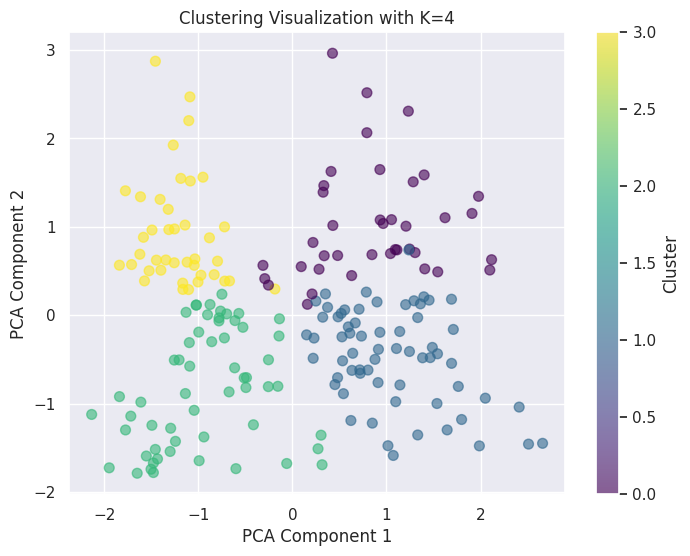

In [13]:


# Apply KMeans clustering with the best number of clusters (4)
kmeans = KMeans(n_clusters=best_cluster_num, random_state=10)
cluster_labels = kmeans.fit_predict(X)

# Perform PCA to reduce the 3D data to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.6)
plt.title('Clustering Visualization with K=4')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
